In [14]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
data = pd.read_csv("../Data/customer_churn_data.csv")

In [5]:
# Drop CustomerID (not useful for model training)
data = data.drop(columns=['CustomerID'])

In [3]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Location', 'PlanType', 'PaymentMethod', 'ChurnStatus']


In [4]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for later use

In [6]:
# Split into features (X) and target (y)
X = data.drop(columns=['ChurnStatus'])
y = data['ChurnStatus']

In [7]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [10]:
# Train Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
# Make Predictions
log_y_pred = log_model.predict(X_test_scaled)
tree_y_pred = tree_model.predict(X_test)

In [16]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [17]:
# Train Logistic Regression model with balanced classes
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [18]:
# Predict probabilities
log_y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]


In [19]:
# Adjust threshold (default is 0.5, try lowering to 0.3)
threshold = 0.3
log_y_pred = (log_y_pred_prob > threshold).astype(int)

In [20]:
# Evaluate Model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, log_y_pred):.2f}")
print(classification_report(y_test, log_y_pred))

Logistic Regression Performance:
Accuracy: 0.21
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.21      1.00      0.35        43

    accuracy                           0.21       200
   macro avg       0.11      0.50      0.18       200
weighted avg       0.05      0.21      0.08       200



C:\Users\ajayr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ajayr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ajayr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [23]:
# Evaluate Decision Tree Model
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, tree_y_pred):.2f}")
print(classification_report(y_test, tree_y_pred))

Decision Tree Performance:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       157
           1       0.20      0.05      0.08        43

    accuracy                           0.76       200
   macro avg       0.49      0.50      0.47       200
weighted avg       0.66      0.76      0.69       200



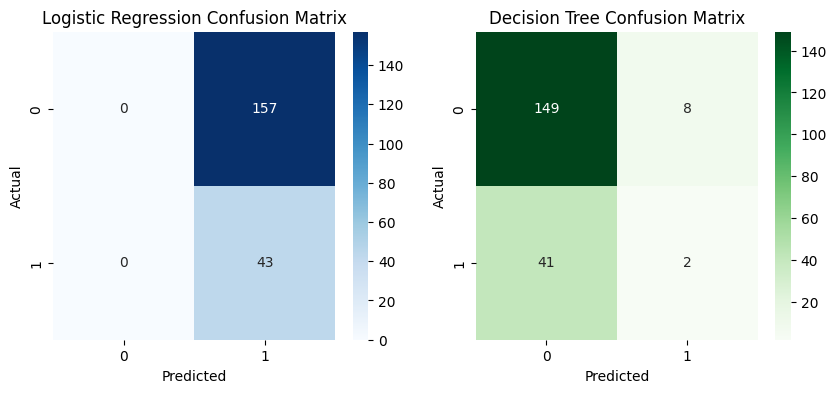

In [24]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, log_y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, tree_y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()